# Apple Defect Detection based on YOLOv2
This notebook has been created by **Dr Raheel Siddiqi**. This experiment exploits the [darkflow package](https://github.com/thtrieu/darkflow) and a dataset of 244 defected apple images available [here](https://github.com/raheelsiddiqi2013/apple-defect-detection/blob/master/Defected%20Apple%20Images%20and%20Their%20Annotations.rar). The problem is to detect *apple defect* on a defected apple image. 

Annotation files for the training images have been created using LabelImg, which is available from [here](https://github.com/tzutalin/labelImg). LabelImg is a graphical image annotation tool, which saves annotations as XML files in PASCAL VOC format.

The *apple defect detection* model is trained on 218 images for 1875 steps. Training process is performed using Tiny Yolo weights and Tiny Yolo .cfg file downloaded from [here](https://pjreddie.com/darknet/yolov2/). The model is tested using 26 test images.

The dataset was collected and compiled by three students of Bahria University (Karachi Campus): Rizwan Hussain, Sohaib Ahmed and Taha.

### Importing relevant packages

In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

### Initializing and Loading the Trained Model

In [2]:
# define the model options and run

options = {
    'model': 'cfg/yolov2-tiny-voc-1c.cfg',
    'load': 1875,
    'threshold': 0.05
}

tfnet = TFNet(options)

Parsing cfg/yolov2-tiny-voc-1c.cfg
Loading None ...
Finished in 0.000997781753540039s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13

### Apple Defect Detection on Images in the Test Set

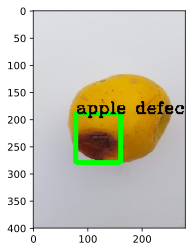

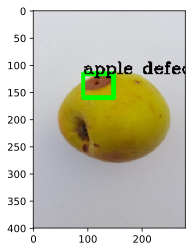

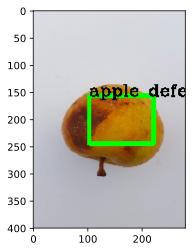

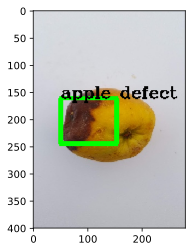

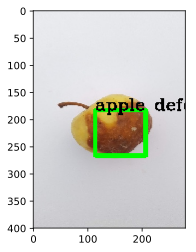

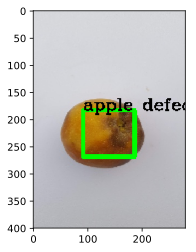

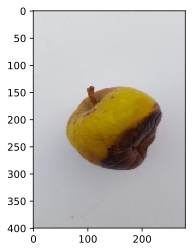

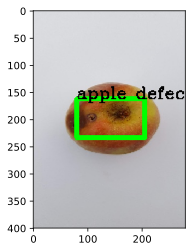

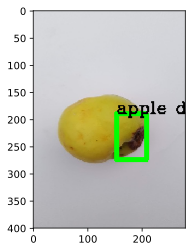

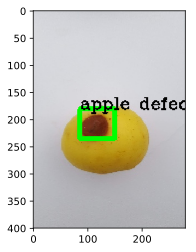

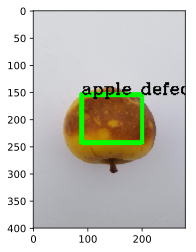

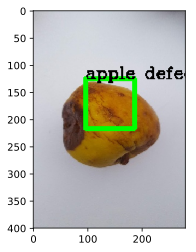

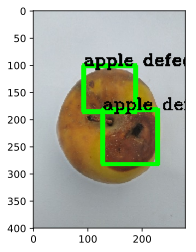

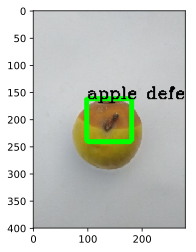

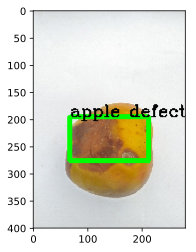

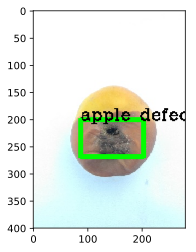

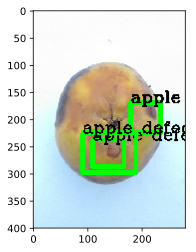

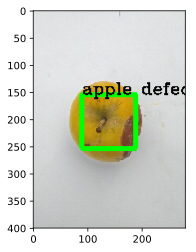

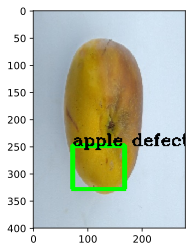

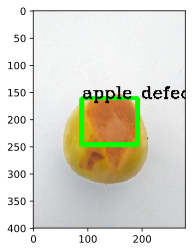

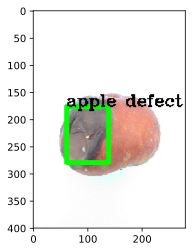

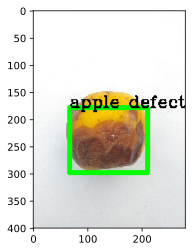

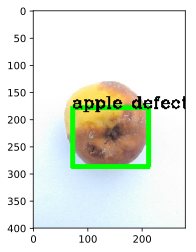

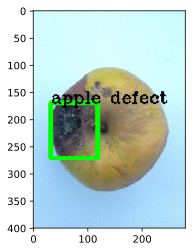

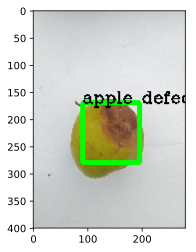

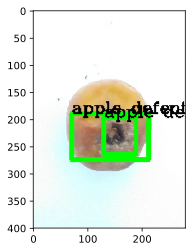

In [3]:
# read the color image and covert to RGB
test_images=['5.jpg','15.jpg','25.jpg','35.jpg','45.jpg','55.jpg','65.jpg','75.jpg','85.jpg','95.jpg','105.jpg','115.jpg','129.jpg','135.jpg','145.jpg','155.jpg','165.jpg','175.jpg','185.jpg','195.jpg','205.jpg','215.jpg','227.jpg','235.jpg','245.jpg','255.jpg']
for i in range(len(test_images)):    
    img = cv2.imread('sample_test_images_defected_apples/images/{}'.format(test_images[i]), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # use YOLO to predict the image
    result = tfnet.return_predict(img)
    len_result=len(result)
    if len_result>0:
        for i in range(len_result):
            tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
            br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
            label = result[i]['label']
            # add the box and label and display it
            img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
            img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(img)
    plt.show()